<a href="https://colab.research.google.com/github/madp3e/5ChClone/blob/master/Titanic_training_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import  random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]

In [7]:
#look at the available features
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
#take a look at how the dataframe looks like 
#check each feature, either alphanumeric, numeric or stringstype

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#check features that are alphanumeric or strings, inlude=["O"]
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
#check survival rate base on Pclass
train_df[["Pclass","Survived"]].groupby("Pclass").mean().sort_values(ascending=True, by="Pclass")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
#check survival rate base on sex
train_df[["Sex","Survived"]].groupby("Sex").mean().sort_values(ascending=True, by="Sex")

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
#check survival rate base on SibSp
train_df[["SibSp","Survived"]].groupby("SibSp").mean().sort_values(ascending=True, by="SibSp")

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [13]:
#check survival rate base on Parch
train_df[["Parch","Survived"]].groupby("Parch").mean().sort_values(ascending=True, by="Parch")

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


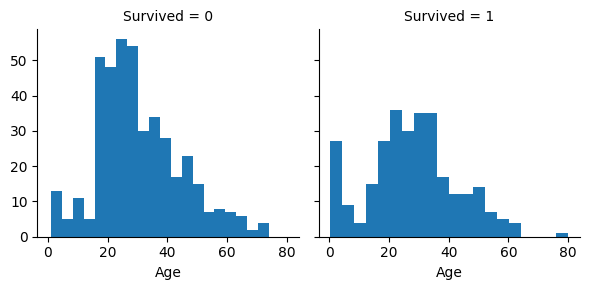

In [14]:
#visualizing the correlation between age and survival rate
sns.FacetGrid(train_df, col="Survived").map(plt.hist, "Age", bins=20)


In [15]:
#learnt
#By visualizing correlation between features and goal, we can decide either to keep the features or expunge them 
#Age and survival rate seems to have correlation, therefore it is worth keeping to be used with our model later

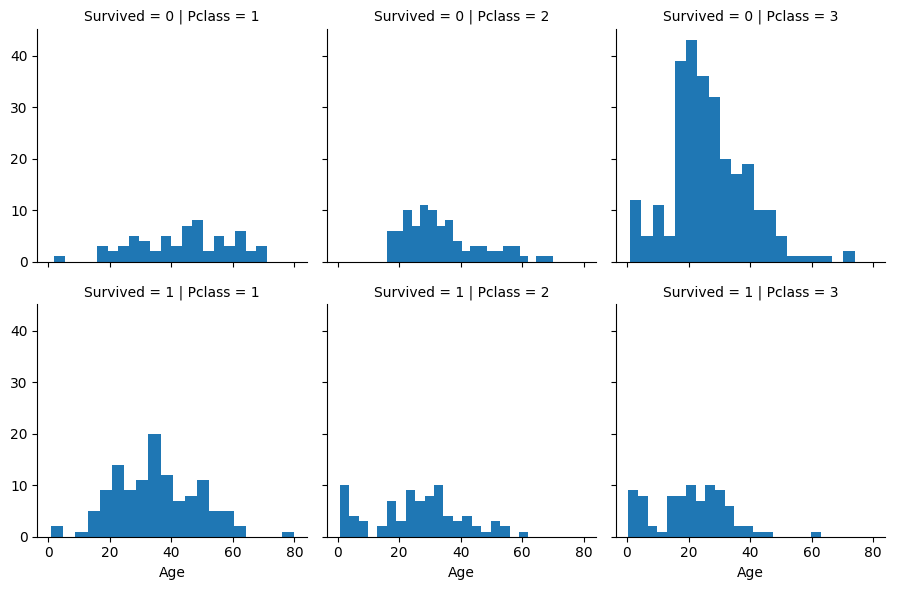

In [16]:
sns.FacetGrid(train_df, col="Pclass", row="Survived").map(plt.hist, "Age", bins=20).add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


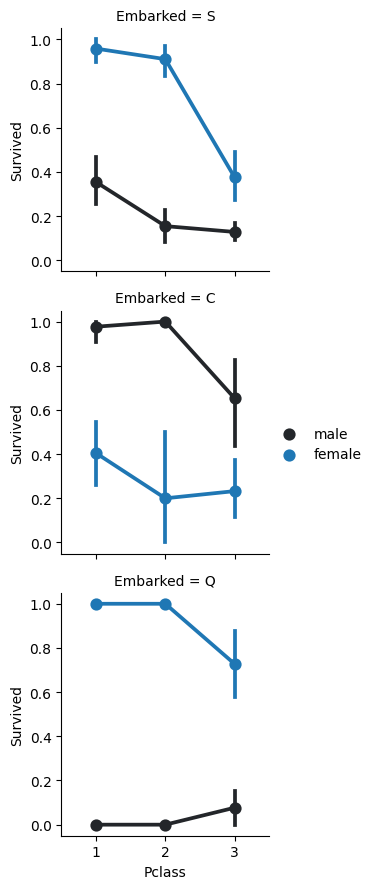

In [17]:
#visualizing the survival rate of sex, based on point of embarktion, and pclass

sns.FacetGrid(train_df, row="Embarked").map(sns.pointplot,"Pclass", "Survived", "Sex").add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


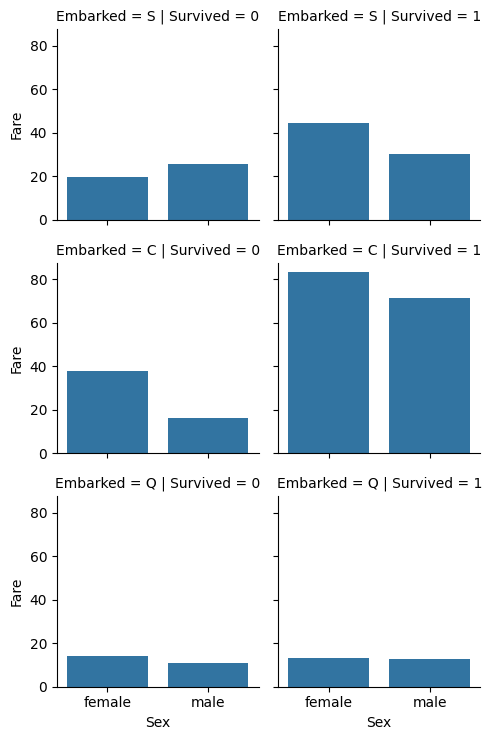

In [18]:
sns.FacetGrid(train_df, col="Survived", row="Embarked", height=2.5).map(sns.barplot, "Sex", "Fare", errorbar=None)

In [133]:
#drop "Ticket" and "Cabin" from the dataset
train_df = train_df.drop(["Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin"], axis=1)
combine = [train_df, test_df]

In [134]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [136]:
#write a function that extract title from Name 
import re
def extract_title(name):
  title = re.search(' ([A-Za-z]+)\.', name).group().strip(".").strip()
  return title

train_df["Title"] = train_df["Name"].apply(extract_title)
test_df["Title"] = train_df["Name"].apply(extract_title)


KeyError: ignored

In [137]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [138]:
train_df.groupby("Title")["Sex"].value_counts().unstack().fillna(0).astype(int)

Sex,female,male
Title,,
1,0,517
2,185,0
3,126,0
4,0,40
5,3,20


In [139]:
def change_title(dataframe):
    dataframe["Title"] = dataframe["Title"].replace(["Lady", "Countess", "Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"Rare")
    dataframe["Title"] = dataframe["Title"].replace({"Mlle" :"Miss","Ms":"Miss","Mme":"Mrs"})
  
    return dataframe

train_df = change_title(train_df)
test_df = change_title(test_df)


In [140]:
train_df[["Title", "Survived"]].groupby("Title").mean()

,Survived
Title,
1,0.156673
2,0.702703
3,0.793651
4,0.575000
5,0.347826


In [141]:
#Title mappng function 
#we will change Mr=1, Miss=2, Mrs=3, Master=4, Rare=5

def title_mapping(df):
  df["Title"] = df["Title"].replace({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
  return df

for df in combine:
  df = title_mapping(df)



In [142]:
train_df = train_df.drop(["PassengerId", "Name"], axis=1)
test_df = test_df.drop(["PassengerId", "Name"], axis=1)



KeyError: ignored

In [125]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


In [148]:
train_df["Sex"].replace({"female":1, "male":0}, inplace=True)
test_df["Sex"].replace({"female":1, "male":0}, inplace=True)


In [149]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5
887,1,1,1,19.0,0,0,30.0000,S,2
888,0,3,1,NaN,1,2,23.4500,S,2
889,1,1,0,26.0,0,0,30.0000,C,1


In [2]:
train_df.head()

NameError: ignored